## Question 1

Paramter for the H0 hypothesis class 0.16577061265038856
MSE for H0 hypothesis class is:  0.005590836110037517

paramters of H1 hypothesis using manual linear regression:  0.046774824638498566 0.14144162633873275
MSE/in sample error for H1 hypothesis class is:  0.005407438524181388

paramters of H1 hypothesis using polyfit package in numpy regression:  0.04677482463849822 0.1414416263387329


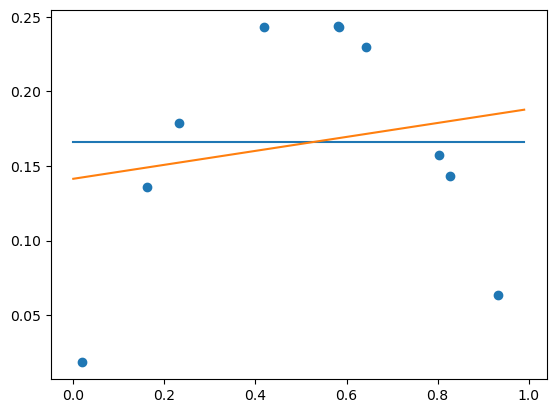

In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt


M = 10
N = 2
data_set_Q1 = np.zeros((M, N,))

for i in range(M):
    for j in range(N):
        data_set_Q1[i,0] = random.uniform(0,1)

def target_func(x):
    return x*(1-x)

## Computing the matrix of elements
data_set_Q1[:,1] = target_func(data_set_Q1[:,0])


mean_x = sum(data_set_Q1[:,0])/len(data_set_Q1[:,0])
mean_fx = sum(data_set_Q1[:,1])/len(data_set_Q1[:,1])


## Manual linear regression for H0 = b

H0_b = mean_fx

# Arrays for plotting
x_plotting = np.arange(0,1,0.01)
H0_b_plotting = np.zeros((len(x_plotting)))

for i in range(len(x_plotting)):
    H0_b_plotting[i] = H0_b 

MSE_H0 = sum((data_set_Q1[:,1] - H0_b)**2)/len(data_set_Q1[:,1])

print("Paramter for the H0 hypothesis class", H0_b)
print("MSE for H0 hypothesis class is: ", MSE_H0)


# Best hypothesis for H0 is plotted as a blue line.
plt.plot(x_plotting, H0_b_plotting) 


## Manual linear regression for H1 = ax+b

squared_x = (data_set_Q1[:,0])**2
x_times_fx = (data_set_Q1[:,0])*(data_set_Q1[:,1])
mean_squared_x = sum(squared_x)/len(squared_x)
mean_x_times_fx = sum(x_times_fx)/len(x_times_fx)


a = (mean_x_times_fx - mean_fx*mean_x)/(mean_squared_x - (mean_x)**2)
b = mean_fx - mean_x*a

MSE_H1 = sum((data_set_Q1[:,1] - (a*data_set_Q1[:,0] + b))**2)/len(data_set_Q1[:,0])
print()
print('paramters of H1 hypothesis using manual linear regression: ', a,b)
print("MSE/in sample error for H1 hypothesis class is: ", MSE_H1)

# Best hypothesis for H1 is plotted as an orange line.
# Arrays for plotting
x_plotting = np.arange(0,1,0.01)
best_hyp = a*x_plotting + b


# Scatter and best fit plots
plt.scatter(data_set_Q1[:,0], data_set_Q1[:,1])
plt.plot(x_plotting, best_hyp)

mean_x_times_fx


# Parameters for linear regression, H1.

#python package for best fit, checking the manual regression
m, c = np.polyfit(data_set_Q1[:,0], data_set_Q1[:,1], 1)

print()
print('paramters of H1 hypothesis using polyfit package in numpy regression: ', m,c)

## Question 2 and 3

In [2]:
import random 
import numpy as np

### Training data 
M = 10000
N = 4
data_set_Q2_train = np.zeros((M, N,))

for i in range(M):
        data_set_Q2_train[i,0] = random.uniform(0,1)
        data_set_Q2_train[i,2] = random.uniform(0,1)


def target_func(x):
    return x*(1-x)

## Computing the matrix of elements
data_set_Q2_train[:,1] = target_func(data_set_Q2_train[:,0])
data_set_Q2_train[:,3] = target_func(data_set_Q2_train[:,2])


#### ERM (MSE) for H0 hypothesis class:


## Function for yielding the best hypothesis for a given sample x
def const_hyp(x):
    return sum(x)/len(x)

H0_set = const_hyp([data_set_Q2_train[:,1],data_set_Q2_train[:,3]])


# Average hypothesis from H0 class:

H0_avg_hyp = sum(H0_set)/len(H0_set)


### Testing data 
M_test = 10000
N_test = 2
data_set_Q2_test = np.zeros((M_test, N_test,))

for i in range(M_test):
        data_set_Q2_test[i,0] = random.uniform(0,1)

## Computing the target function values 
data_set_Q2_test[:,1] = target_func(data_set_Q2_test[:,0])


## Bias and variance estimates for H0:

bias_H0_x = (H0_avg_hyp - data_set_Q2_test[1])**2
bias_H0 = sum(bias_H0_x)/len(bias_H0_x)
variance_H0_x = sum((H0_set - H0_avg_hyp)**2)/len(H0_set)


# Since hypotheses in H0 class are independent of x, varaince after taking expectation over x is the same as var(x).
variance_H0 = variance_H0_x

# plt.plot(x_plotting, 0*x_plotting+H0_avg_hyp, 'bo')

print('The expected value of the b for the hypothesis in the H0 class is: ', H0_avg_hyp)
print("Bias and vaiance for the H0 hypothesis class is:", bias_H0, 'and', variance_H0)
print("Out of sample error for H0 hypothesis class is:", bias_H0 + variance_H0)
print()


#### ERM (MSE) for H1 hypothesis class: 
data_set_Q2_train_x = [data_set_Q2_train[:,0], data_set_Q2_train[:,2]]
data_set_Q2_train_fx = [data_set_Q2_train[:,1], data_set_Q2_train[:,3]]

mean_x = sum(data_set_Q2_train_x)/len(data_set_Q2_train_x)
mean_fx = sum(data_set_Q2_train_fx)/len(data_set_Q2_train_fx)

squared_x = ([data_set_Q2_train[:,0]**2,data_set_Q2_train[:,2]**2])
x_times_fx = ([data_set_Q2_train[:,0]*data_set_Q2_train[:,1],data_set_Q2_train[:,2]*data_set_Q2_train[:,3]])

mean_squared_x = sum(squared_x)/len(squared_x)
mean_x_times_fx = sum(x_times_fx)/len(x_times_fx)

a = (mean_x_times_fx - mean_fx*mean_x)/(mean_squared_x - (mean_x)**2)
b = mean_fx - mean_x*a

## Average hypothesis for H1 class.
a_avg = sum(a)/len(a)
b_avg = sum(b)/len(b)
H1_avg_hyp_parameters = [a_avg, b_avg]

## Bias and variance estimates for H1 class.

bias_H1_x = (a_avg*data_set_Q2_test[:,0] + b_avg - data_set_Q2_test[:,1])**2
bias_H1 = sum(bias_H1_x)/len(bias_H1_x)


variance_H1_x = np.zeros(len(a),)
for i in range(len(a)):
    var_elements = (a_avg*data_set_Q2_test[:,0] + b_avg - a[i]*data_set_Q2_test[:,0] + b[i])**2
    variance_H1_x[i] = sum(var_elements)/len(var_elements)

variance_H1 = sum(variance_H1_x)/len(variance_H1_x)


print('The expected values of the a and b for the hypothesis in the H1 class are: ')
print( H1_avg_hyp_parameters)

print("Bias and vaiance for the H1 hypothesis class is:", bias_H1, variance_H1)
print("Out of sample error for H1 hypothesis class is:", bias_H0 +variance_H1)

The expected value of the b for the hypothesis in the H0 class is:  0.16794346432299773
Bias and vaiance for the H0 hypothesis class is: 0.03496678020963452 and 0.0027093716937030142
Out of sample error for H0 hypothesis class is: 0.037676151903337535

The expected values of the a and b for the hypothesis in the H1 class are: 
[-0.000584583845647106, 0.25104769575842695]
Bias and vaiance for the H1 hypothesis class is: 0.012646198685413314 0.4373944022908211
Out of sample error for H1 hypothesis class is: 0.4723611825004556
